In [1]:
import oemof.solph as solph
import oemof.graph as graph
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Restore an energysystem

In [2]:
energysystem = solph.EnergySystem()
energysystem.restore(dpath=None, filename=None)

'Attributes restored from: /home/local/RL-INSTITUT/jann.launer/.oemof/dumps/es_dump.oemof'

### Create graph

In [3]:
energysystem_graph = graph.create_nx_graph(energysystem)

### Pickle graph for later

In [4]:
graph_file_name = 'energysystem_graph'
nx.readwrite.write_gpickle(G=energysystem_graph, path=graph_file_name)

### Define function for drawing graph

The layout should be the following: Define several parallel vertical lines and distribute the components on lines like: 
* resources, wind, pv
* converters
* buses
* consumption

In [5]:
def draw_graph(grph, edge_labels=True, node_color='#AFAFAF',
               edge_color='#CFCFCF', plot=True, node_size=2000,
               with_labels=True, arrows=True, layout='neato'):
    """
    Draw a graph. This function will be removed in future versions.

    Parameters
    ----------
    grph : networkxGraph
        A graph to draw.
    edge_labels : boolean
        Use nominal values of flow as edge label
    node_color : dict or string
        Hex color code oder matplotlib color for each node. If string, all
        colors are the same.

    edge_color : string
        Hex color code oder matplotlib color for edge color.

    plot : boolean
        Show matplotlib plot.

    node_size : integer
        Size of nodes.

    with_labels : boolean
        Draw node labels.

    arrows : boolean
        Draw arrows on directed edges. Works only if an optimization_model has
        been passed.
    layout : string
        networkx graph layout, one of: neato, dot, twopi, circo, fdp, sfdp.
    """
    if type(node_color) is dict:
        node_color = [node_color.get(g, '#AFAFAF') for g in grph.nodes()]

    # set drawing options
    options = {
     'prog': 'dot',
     'with_labels': with_labels,
     'node_color': node_color,
     'edge_color': edge_color,
     'node_size': node_size,
     'arrows': arrows
    }

    # draw graph
    pos = nx.drawing.nx_agraph.graphviz_layout(grph, prog=layout)

    nx.draw(grph, pos=pos, **options)

    # add edge labels for all edges
    if edge_labels is True and plt:
        labels = nx.get_edge_attributes(grph, 'weight')
        nx.draw_networkx_edge_labels(grph, pos=pos, edge_labels=labels)

    # show output
    if plot is True:
        plt.show()

### Read back pickled graph

In [6]:
energysystem_graph = nx.readwrite.read_gpickle('energysystem_graph')

### Draw graph

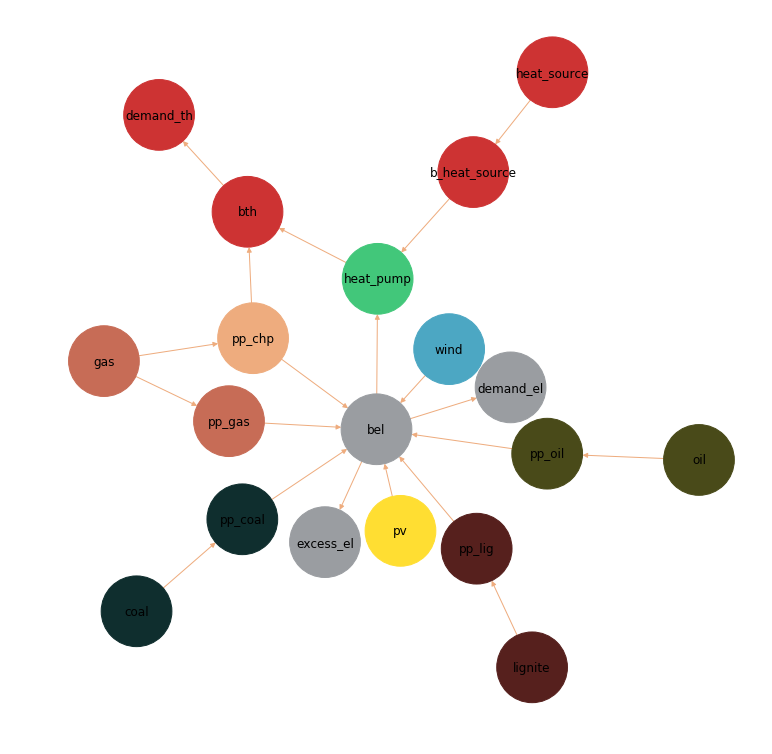

In [7]:
# Graph: edge_labels hinzufügen und Lösung mitschicken.
# Farbzuweisung verbessern

matplotlib.rcParams['figure.figsize'] = [10.0, 10.0]
draw_graph(energysystem_graph, node_size=5000,
            node_color={
                         'coal': '#0f2e2e',
                         'gas': '#c76c56',
                         'oil': '#494a19',
                         'lignite': '#56201d',
                         'bel': '#9a9da1',
                         'bth': '#cd3333',
                         'wind': '#4ca7c3',
                         'pv': '#ffde32',
                         'demand_el': '#9a9da1',
                         'excess_el': '#9a9da1',
                         'demand_th': '#cd3333',
                         'pp_coal': '#0f2e2e',
                         'pp_lig': '#56201d',
                         'pp_gas': '#c76c56',
                         'pp_oil': '#494a19',
                         'pp_chp': '#eeac7e',
                         'b_heat_source': '#cd3333',
                         'heat_source': '#cd3333',
                         'heat_pump': '#42c77a'},
            edge_color='#eeac7e')

Use automatic color palette generators

useful Links:  
http://javier.xyz/cohesive-colors/  
https://colourco.de/  
http://seaborn.pydata.org/tutorial/color_palettes.html